# Базовое решение Задачи 3 "Кластеризация физической активности"

В современном мире существуют множество различных устройств (фитнес-браслетов, камер, датчиков и т.д.), которые собирают данные об активности пользователя. Эти сведения могут быть использованы, например, для отслеживания состояния здоровья человека и определение находится ли он сейчас в безопасности, что он делает и так далее.

Данные, собранные с носимых устройств, которые отслеживают физическую активность пользователей, используются во множестве коммерческих приложений, включая здравоохранение, фитнес-тренировки, навигационную систему и так далее.

В данной задаче вам предлагается, используя информацию, собранную с помощью трех Инерциальных измерительных модуля (IMU) и пульсометра.

**Датасет содержит по 54 столбца на строку, столбцы содержат следующие данные:**
- 1 временная метка (с)
- 2 частота сердечных сокращений (уд/мин)
- 3-19 данные с датчиков на руке
- 20-36 данные с датчиков на груди
- 37-53 данные с датчиков на лодыжке

**Сенсорные данные IMU содержат следующие столбцы:**
- 1 температура (°C)
- 2-4 Данные 3D-ускорения (мс-2), масштаб: ±16g, разрешение: 13 бит
- 5-7 Данные 3D-ускорения (мс-2), масштаб: ±6g, разрешение: 13 бит*
- 8-10 данных 3D-гироскопа (рад/с)
- 11-13 Данные 3D-магнитометра (мкТл)

## Загрузка данных

In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/competitions/clustering-physical-activity-data")
# {"username":"adele1997","key":"72a5b06391529c16b0e444311c9af408"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Extracting archive ./clustering-physical-activity-data/clustering-physical-activity-data.zip to ./clustering-physical-activity-data


## Исследование и предварительная предобработка

In [3]:
# иморитирование всех необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

X = pd.read_csv("/content/clustering-physical-activity-data/Physical_Activity_Monitoring_unlabeled.csv")
X

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.54470,27.3336,-5.766200,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.82570,-15.7719,-1.313950,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.81710,16.3089,25.292800,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.74180,34.3566,21.327400,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.77980,-3.9981,10.995000,0.171133,-0.748343,0.252988,-0.588807,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.8750,-9.084250,4.70122,2.890170,-9.689610,6.78077,3.975430,-0.157406,0.774189,...,0.424520,-0.856836,-25.00990,-23.5557,23.615300,0.318171,-0.701921,0.555778,-0.311745,5
534597,2448.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.767710,-3.050980,-35.70240,31.8018,16.421800,0.435887,0.660643,0.371665,0.485200,5
534598,2479.84,34.6875,-6.367550,2.32131,2.207640,-6.362460,2.33049,2.607610,0.206349,-0.359415,...,-0.034144,-0.402013,-49.69220,20.6039,-0.917908,0.561652,0.297957,0.756767,0.151899,5
534599,3437.82,28.0625,5.461940,10.43640,-9.073300,8.348860,5.76518,-6.143210,3.543910,2.757300,...,0.352062,-5.577750,-34.15510,-11.0786,39.737500,0.062163,-0.798705,-0.056668,-0.595815,6


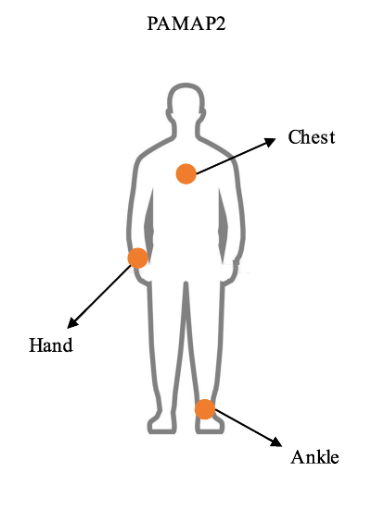

In [27]:
X.columns
# hand -
# chest -
# ankle -

# 'hand Acc 16_1 (x)', 'hand Acc 16_2 (y)', 'hand Acc 16_3 (z)' - acceleration
# 'handAcc6_1', 'handAcc6_2', 'handAcc6_3'

# hand Acc = sqrt(x^2 + y^2 + z^2)
# hand Acc mean = (x + y + z)/3
# hand Acc sum = (x + y + z)
# hand Acc mean = median(x, y,  z)

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id', 'handAcc16', 'handAcc6', 'handGyro', 'ha

In [6]:
X.shape

(534601, 53)

In [11]:
missing_values = X.isnull().sum()  # Количество пропусков
total_rows = len(X)  # Общее число строк

# Фильтруем только столбцы с пропусками
missing_data = missing_values[missing_values > 0].to_frame(name="Missing Count")
missing_data["Missing Percentage"] = (missing_data["Missing Count"] / total_rows) * 100

missing_data

,Missing Count,Missing Percentage
handTemperature,4041,0.755891
handAcc16_1,4041,0.755891
handAcc16_2,4041,0.755891
handAcc16_3,4041,0.755891
handAcc6_1,4041,0.755891
handAcc6_2,4041,0.755891
handAcc6_3,4041,0.755891
handGyro1,4041,0.755891
handGyro2,4041,0.755891
handGyro3,4041,0.755891


In [12]:
X.isnull().sum().sum()

np.int64(125732)

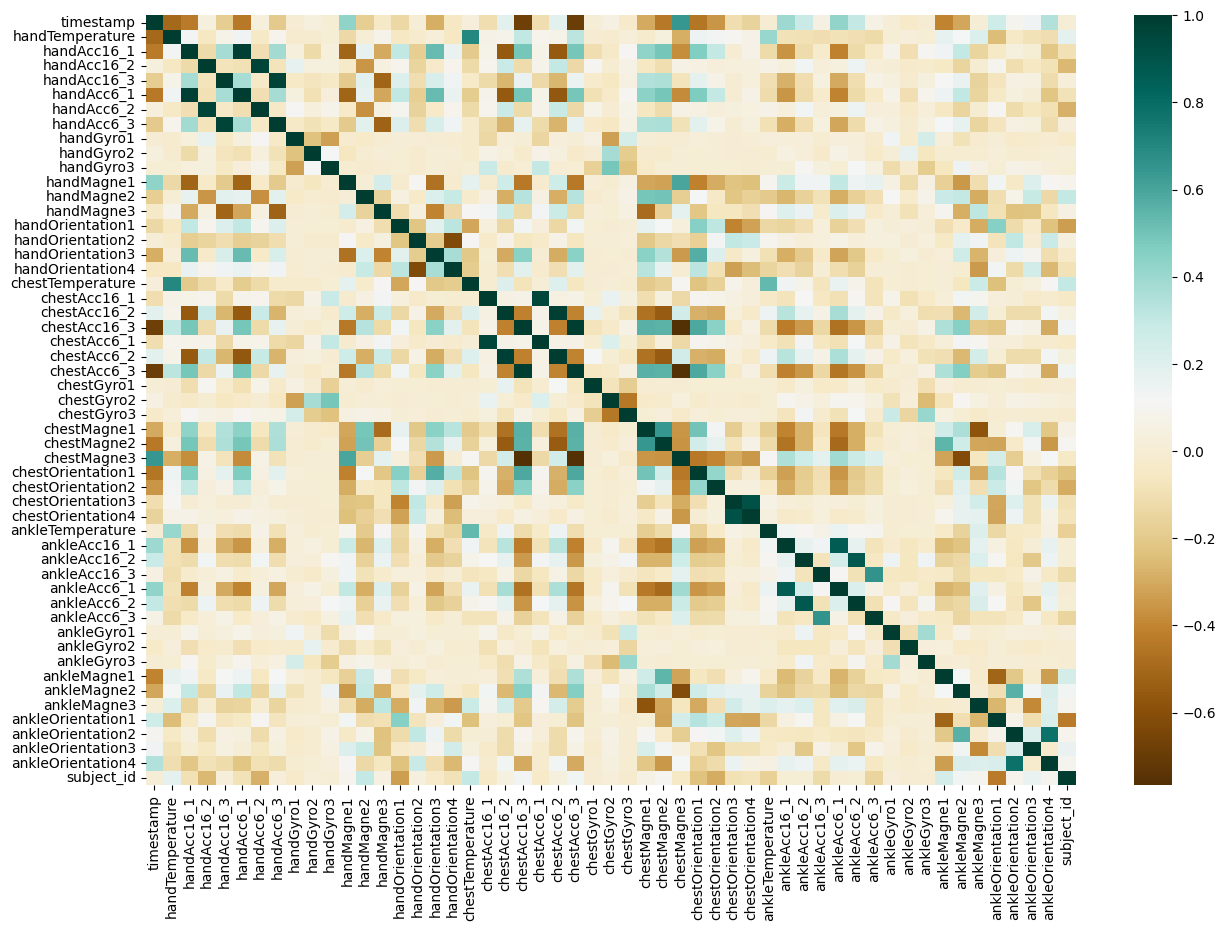

In [13]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = X.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

In [ ]:
# import numpy as np

# from sklearn.impute import KNNImputer

# X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

# imputer = KNNImputer(n_neighbors=2)
# imputer.fit_transform(X)

# imputer.to_csv('prepared_data.csv')

In [5]:
imu_columns = [col for col in X.columns if 'Acc' in col \
               or 'Gyro' in col \
               or 'Magne' in col \
               or 'Temperature' in col \
               or 'Orientation' in col]

X[imu_columns] = X[imu_columns].interpolate(method='linear')

X.isna().sum().sum()

np.int64(0)

In [30]:
X.columns

Index(['timestamp', 'handTemperature', 'handAcc16_1', 'handAcc16_2',
       'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 'handGyro1',
       'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3',
       'handOrientation1', 'handOrientation2', 'handOrientation3',
       'handOrientation4', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id', 'handAcc16', 'handAcc6', 'handGyro', 'ha

In [6]:
import numpy as np
# 'handAcc16_1', 'handAcc16_2', 'handAcc16_3' - X, Y, Z = handAcc16
# 'handAcc6_1', 'handAcc6_2', 'handAcc6_3' - X, Y, Z = handAcc6
# 'handGyro1', 'handGyro2', 'handGyro3' = handGyro
# 'handMagne1', 'handMagne2', 'handMagne3' = handMagne
# Тоже самое для остальных частей тела

sensors = ['handAcc16', 'handAcc6', 'handGyro', 'handMagne',
           'chestAcc16', 'chestAcc6', 'chestGyro', 'chestMagne',
           'ankleAcc16', 'ankleAcc6', 'ankleGyro', 'ankleMagne']

for sensor in sensors:
    cols = [f"{sensor}_1", f"{sensor}_2", f"{sensor}_3"]
    if all(col in X.columns for col in cols):  # Проверяем, есть ли такие колонки
        X[f"{sensor}"] = np.sqrt(X[cols[0]]**2 + X[cols[1]]**2 + X[cols[2]]**2)

    cols = [f"{sensor}1", f"{sensor}2", f"{sensor}3"]
    if all(col in X.columns for col in cols):  # Проверяем, есть ли такие колонки
        X[f"{sensor}"] = np.sqrt(X[cols[0]]**2 + X[cols[1]]**2 + X[cols[2]]**2)

X

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,handGyro,handMagne,chestAcc16,chestAcc6,chestGyro,chestMagne,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne
0,252.75,34.87500,0.902847,7.458720,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,0.022347,34.425872,9.476392,9.877675,0.039630,48.756258,10.130236,9.819462,0.059178,31.494810
1,3652.45,29.75000,-4.069330,3.761680,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,0.393683,55.213200,12.175270,11.229790,0.475300,43.098251,6.958333,8.182519,1.934298,36.441815
2,504.76,34.37500,-2.007540,-9.601800,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,0.048141,29.232354,9.816755,9.797023,0.041782,26.697400,9.990753,9.828768,0.066698,35.493509
3,2801.61,31.93750,-13.262200,5.854430,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,2.508222,49.067975,12.559313,13.233767,0.504263,39.066927,14.122803,18.410660,4.589847,48.480489
4,441.01,33.50000,-0.013940,8.665400,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,0.034214,30.426190,9.779122,9.851332,0.063361,26.316878,9.957803,9.869706,0.031659,21.283705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,3479.53,33.87500,-9.084250,4.701220,2.890170,-9.689610,6.78077,3.975430,-0.157406,0.774189,...,4.439972,43.590911,12.620551,14.361430,2.130969,37.842988,22.912390,24.519167,1.180975,41.689909
534597,2448.49,34.28125,-7.725900,3.511265,2.548905,-8.026035,4.55563,3.291520,0.024472,0.207387,...,3.173109,54.518681,12.290140,12.799206,0.790134,41.034572,18.156183,13.818043,3.880268,50.553846
534598,2479.84,34.68750,-6.367550,2.321310,2.207640,-6.362460,2.33049,2.607610,0.206349,-0.359415,...,2.006605,65.638750,4.601540,4.580937,0.533880,60.543222,9.800323,9.549536,0.844063,53.802212
534599,3437.82,28.06250,5.461940,10.436400,-9.073300,8.348860,5.76518,-6.143210,3.543910,2.757300,...,4.491072,50.628692,38.093478,35.690278,1.742387,46.340162,5.637294,33.075838,6.556362,53.557214


In [7]:
sensors = ['handAcc16', 'handAcc6', 'handGyro', 'handMagne',
           'chestAcc16', 'chestAcc6', 'chestGyro', 'chestMagne',
           'ankleAcc16', 'ankleAcc6', 'ankleGyro', 'ankleMagne']

temperature = ['handTemperature', 'chestTemperature', 'ankleTemperature']

orient = ['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
          'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
          'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

X_new = X[sensors + temperature]
X_new

,handAcc16,handAcc6,handGyro,handMagne,chestAcc16,chestAcc6,chestGyro,chestMagne,ankleAcc16,ankleAcc6,ankleGyro,ankleMagne,handTemperature,chestTemperature,ankleTemperature
0,9.635277,9.807519,0.022347,34.425872,9.476392,9.877675,0.039630,48.756258,10.130236,9.819462,0.059178,31.494810,34.87500,36.6250,34.1250
1,9.963104,9.684555,0.393683,55.213200,12.175270,11.229790,0.475300,43.098251,6.958333,8.182519,1.934298,36.441815,29.75000,34.6875,33.6250
2,9.839886,9.816385,0.048141,29.232354,9.816755,9.797023,0.041782,26.697400,9.990753,9.828768,0.066698,35.493509,34.37500,37.6250,33.9375
3,14.524775,14.864982,2.508222,49.067975,12.559313,13.233767,0.504263,39.066927,14.122803,18.410660,4.589847,48.480489,31.93750,36.5000,34.5625
4,9.717695,9.832993,0.034214,30.426190,9.779122,9.851332,0.063361,26.316878,9.957803,9.869706,0.031659,21.283705,33.50000,35.8125,34.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,10.629118,12.476836,4.439972,43.590911,12.620551,14.361430,2.130969,37.842988,22.912390,24.519167,1.180975,41.689909,33.87500,36.4375,34.1250
534597,8.860893,9.798220,3.173109,54.518681,12.290140,12.799206,0.790134,41.034572,18.156183,13.818043,3.880268,50.553846,34.28125,38.2500,34.1875
534598,7.127962,7.260283,2.006605,65.638750,4.601540,4.580937,0.533880,60.543222,9.800323,9.549536,0.844063,53.802212,34.68750,38.3125,34.3125
534599,14.868625,11.860851,4.491072,50.628692,38.093478,35.690278,1.742387,46.340162,5.637294,33.075838,6.556362,53.557214,28.06250,33.1875,33.8125


In [19]:
X_new.isna().sum().sum()

np.int64(0)

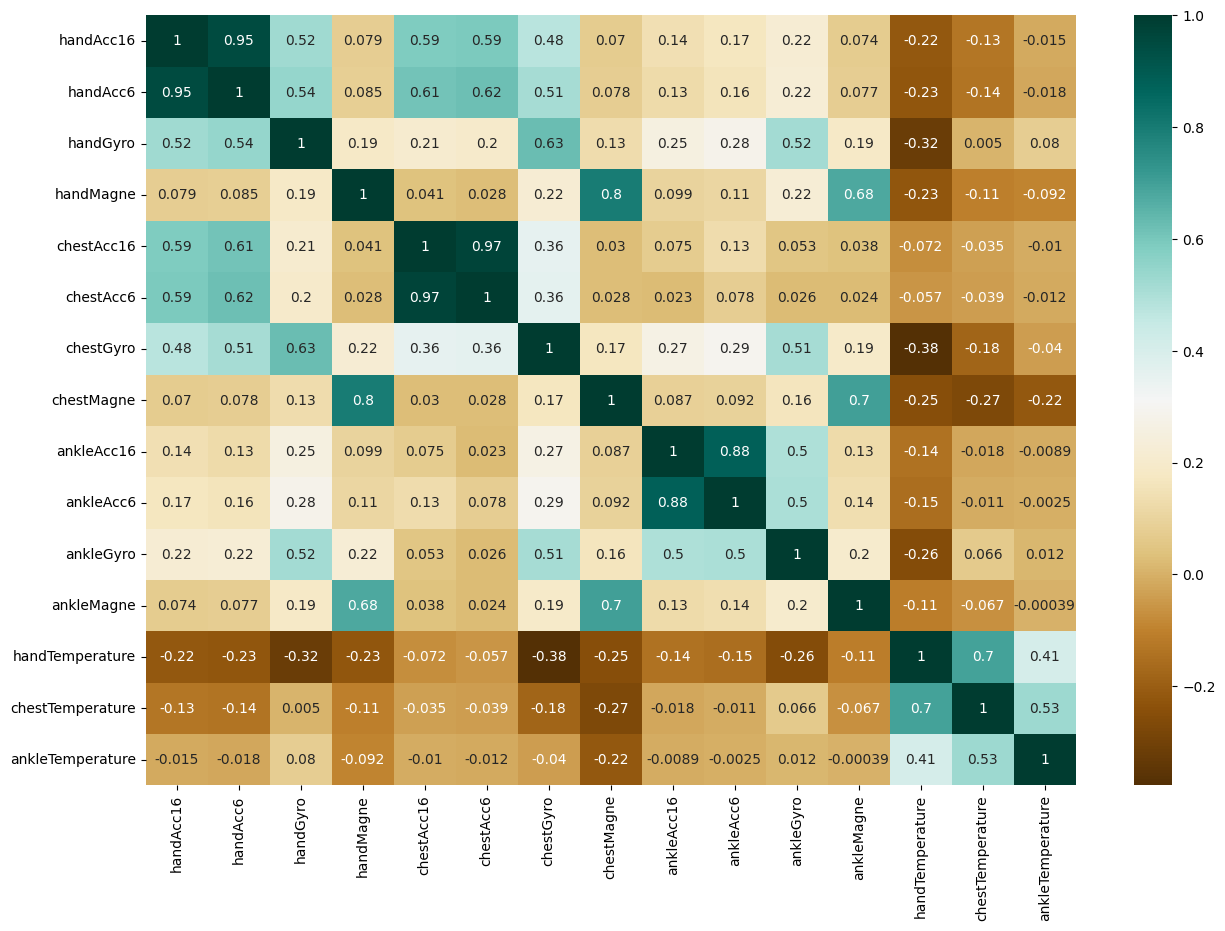

In [20]:
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np

df_corr = X_new.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG",ax=ax, annot=True)
plt.show()

In [8]:
X_new.drop(columns=['handAcc6', 'chestAcc6', 'ankleAcc6'], inplace=True)

In [23]:
X_train = X_new[:30000]

100%|██████████| 13/13 [02:23<00:00, 11.06s/it]


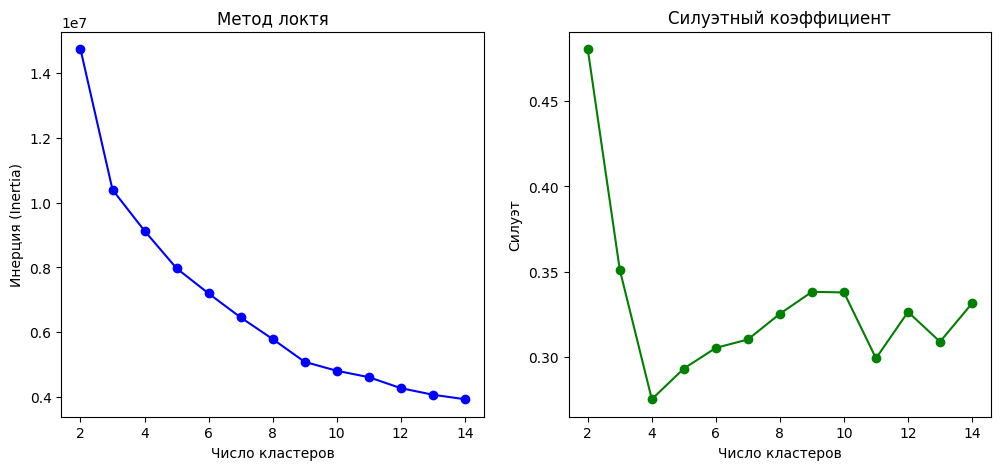

CPU times: user 2min 35s, sys: 36.3 s, total: 3min 12s
Wall time: 2min 24s


In [25]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from tqdm import tqdm

# Диапазон количества кластеров
cluster_range = range(2, 15)

# Списки для хранения метрик
inertia = []  # Для метода локтя
silhouette_scores = []  # Для силуэта

# Перебираем количество кластеров от 2 до 20
for k in tqdm(cluster_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train)

    inertia.append(kmeans.inertia_)  # Добавляем значение инерции

    # Считаем силуэтный коэффициент (если кластеров < 2, силуэт считать нельзя)
    silhouette_scores.append(silhouette_score(X_train, labels))

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# График локтя (Inertia)
ax[0].plot(cluster_range, inertia, marker='o', linestyle='-', color='b')
ax[0].set_title("Метод локтя")
ax[0].set_xlabel("Число кластеров")
ax[0].set_ylabel("Инерция (Inertia)")

# График силуэта
ax[1].plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
ax[1].set_title("Силуэтный коэффициент")
ax[1].set_xlabel("Число кластеров")
ax[1].set_ylabel("Силуэт")

plt.show()

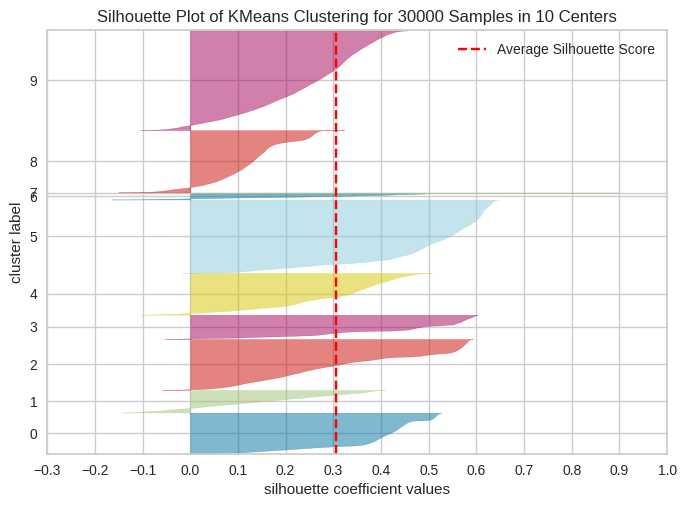

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=10, random_state=42))

In [26]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(10, random_state=42), X_train, colors='yellowbrick')

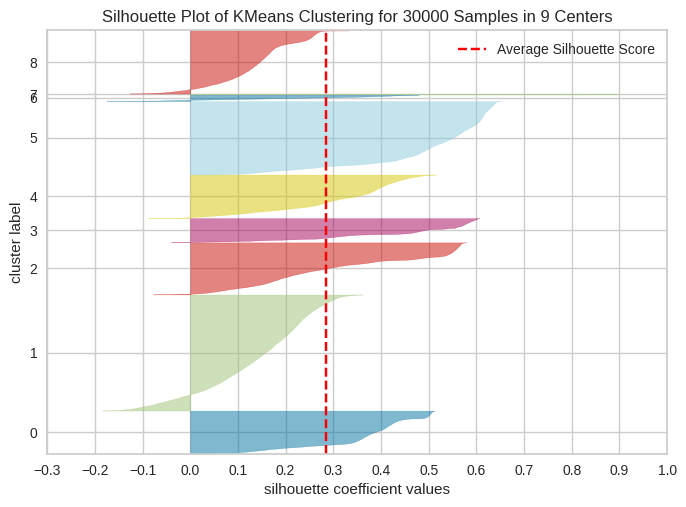

CPU times: user 22.8 s, sys: 7.31 s, total: 30.1 s
Wall time: 26.4 s


SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 30000 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=9, random_state=42))

In [10]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from tqdm import tqdm

X_train = X_new[:30000]

from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(9, random_state=42), X_train, colors='yellowbrick')

In [11]:
%%time
from sklearn.cluster import KMeans

n_clusters = 9

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(X_new)

# inertia
inertia = clusterer.inertia_

CPU times: user 1.3 s, sys: 78 ms, total: 1.38 s
Wall time: 1.04 s


In [12]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

# 1 = 1
# 5 = 2
# 0 = 3
# 2 = 4
# ...

,index,activityID
0,0,3
1,1,3
2,2,5
3,3,0
4,4,1
...,...,...
534596,534596,7
534597,534597,0
534598,534598,8
534599,534599,0


In [14]:
predictions['activityID'].unique()

array([3, 5, 0, 1, 4, 8, 7, 2, 6], dtype=int32)

In [15]:
%%time

predictions['new_label'] = -1

# 1 = 1
# 5 = 2
# 0 = 3
# 2 = 4
# ....
# [3, 5, 0, 1, 4, 8, 7, 2, 6
for index, row in predictions.iterrows():
    if row['activityID'] == 3:
        predictions.loc[index, 'new_label'] = 1
    if row['activityID'] == 5:
        predictions.loc[index, 'new_label'] = 2
    if row['activityID'] == 0:
        predictions.loc[index, 'new_label'] = 3
    if row['activityID'] == 1:
        predictions.loc[index, 'new_label'] = 4

    if row['activityID'] == 4:
        predictions.loc[index, 'new_label'] = 5
    if row['activityID'] == 8:
        predictions.loc[index, 'new_label'] = 6
    if row['activityID'] == 7:
        predictions.loc[index, 'new_label'] = 7
    if row['activityID'] == 2:
        predictions.loc[index, 'new_label'] = 8
    if row['activityID'] == 6:
        predictions.loc[index, 'new_label'] = 9
    # .... и т.д.

predictions

CPU times: user 1min 59s, sys: 102 ms, total: 1min 59s
Wall time: 2min 4s


,index,activityID,new_label
0,0,3,1
1,1,3,1
2,2,5,2
3,3,0,3
4,4,1,4
...,...,...,...
534596,534596,7,7
534597,534597,0,3
534598,534598,8,6
534599,534599,0,3


In [16]:
predictions = predictions.drop(columns=['activityID'])
predictions.columns = ['index','activityID']
predictions.to_csv('submition_v2.csv', index=False)

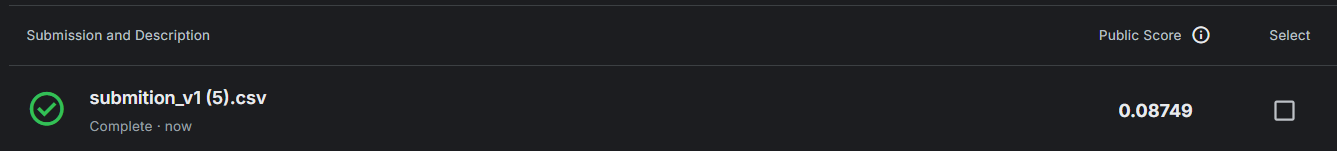

# Варианты для обсуждения

In [44]:
IMU_hand = ['handTemperature',
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3',
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
           'handGyro1', 'handGyro2', 'handGyro3',
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMU_chest = ['chest_Temperature',
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3',
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
           'chestGyro1', 'chestGyro2', 'chestGyro3',
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMU_ankle = ['ankle_Temperature',
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3',
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

In [46]:
X_hand = X[IMU_hand]

In [47]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,  RobustScaler

# StandardScaler - ср знач, std
# MinMaxScaler - min, max
scaler = RobustScaler()

X_hand_scaled = scaler.fit_transform(X_hand)

X_hand_scaled

array([[ 0.8       ,  0.67212054,  0.8986049 , ..., -0.4311748 ,
         0.85442635,  0.77150305],
       [-1.25      ,  0.14566402,  0.13824707, ..., -0.55423604,
        -0.10688119,  0.37000987],
       [ 0.6       ,  0.36396735, -2.61017511, ...,  1.11299003,
         0.87749615, -0.54837231],
       ...,
       [ 0.725     , -0.09767263, -0.15798901, ...,  1.23120991,
        -0.26110901, -0.80959526],
       [-1.925     ,  1.15483952,  1.51101437, ..., -0.0757585 ,
         0.56690299, -0.41400243],
       [ 0.175     , -0.40031718, -0.22282542, ..., -0.5119693 ,
        -0.84868619,  0.2009064 ]])

100%|██████████| 13/13 [07:37<00:00, 35.20s/it]


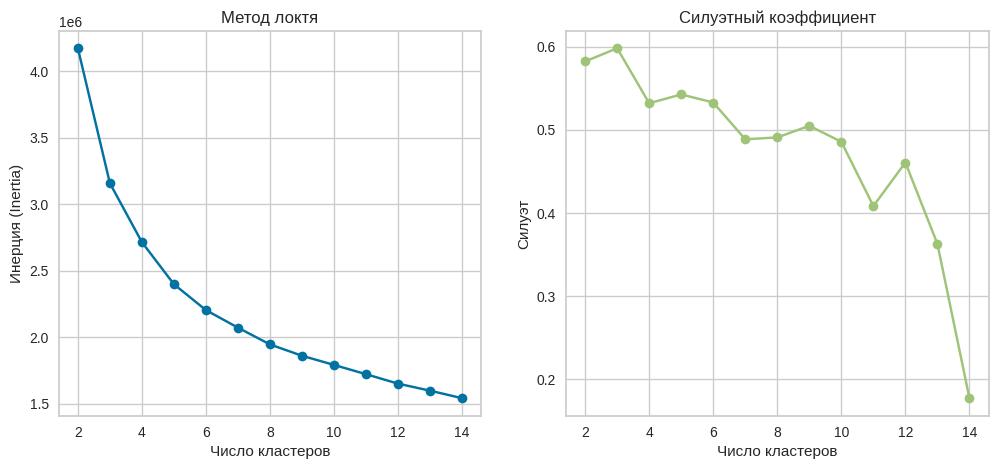

CPU times: user 8min 5s, sys: 1min 41s, total: 9min 46s
Wall time: 7min 37s


In [48]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from tqdm import tqdm

# Диапазон количества кластеров
cluster_range = range(2, 15)

# Списки для хранения метрик
inertia = []  # Для метода локтя
silhouette_scores = []  # Для силуэта

# Перебираем количество кластеров от 2 до 20
for k in tqdm(cluster_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_hand_scaled[:50000])

    inertia.append(kmeans.inertia_)  # Добавляем значение инерции

    # Считаем силуэтный коэффициент (если кластеров < 2, силуэт считать нельзя)
    silhouette_scores.append(silhouette_score(X_hand_scaled[:50000], labels))

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# График локтя (Inertia)
ax[0].plot(cluster_range, inertia, marker='o', linestyle='-', color='b')
ax[0].set_title("Метод локтя")
ax[0].set_xlabel("Число кластеров")
ax[0].set_ylabel("Инерция (Inertia)")

# График силуэта
ax[1].plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='g')
ax[1].set_title("Силуэтный коэффициент")
ax[1].set_xlabel("Число кластеров")
ax[1].set_ylabel("Силуэт")

plt.show()